In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape =(64,)),
    Dense(16,activation ='relu',name = 'layer_1'),
    Dense(16,activation = 'relu',name = 'layer_2'),
    Dense(16,activation = 'relu',name = 'layer_3'),
    Dense(8,activation = 'softmax',name = 'softmax')
])


In [ ]:
# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
layer_2 (Dense)              (None, 16)                272       
_________________________________________________________________
layer_3 (Dense)              (None, 16)                272       
_________________________________________________________________
softmax (Dense)              (None, 8)                 136       
Total params: 1,720
Trainable params: 1,720
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model

# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,(3,3),padding = 'SAME',activation = 'relu',input_shape =(28,28,1)
    ,data_format ='channels_last'),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),padding = 'SAME',activation = 'relu',data_format ='channels_last'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation ='relu',name = 'layer_6'),
    Dense(10,activation ='softmax')
])

In [ ]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
layer_6 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense (Dense)                (None, 10)               

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics = [acc,mae])

In [ ]:
# Print the resulting model attributes
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)


sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [ ]:
train_labels[1]

0

In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [ ]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.
test_images = test_images/255.


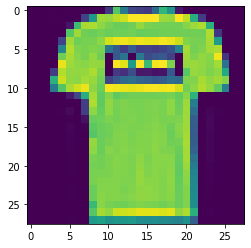

Labels:T-shirt/top


In [ ]:
# Display one of the images
i = 1
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'Labels:{labels[train_labels[i]]}')


#### Fit the model

In [ ]:
# Fit the model

history = model.fit(train_images[...,np.newaxis],train_labels,epochs=10,batch_size=256,verbose=2)

Epoch 1/10
235/235 - 32s - loss: 0.7608 - sparse_categorical_accuracy: 0.7438 - mean_absolute_error: 4.4200
Epoch 2/10
235/235 - 1s - loss: 0.4329 - sparse_categorical_accuracy: 0.8460 - mean_absolute_error: 4.4200
Epoch 3/10
235/235 - 1s - loss: 0.3832 - sparse_categorical_accuracy: 0.8644 - mean_absolute_error: 4.4200
Epoch 4/10
235/235 - 1s - loss: 0.3542 - sparse_categorical_accuracy: 0.8744 - mean_absolute_error: 4.4200
Epoch 5/10
235/235 - 1s - loss: 0.3336 - sparse_categorical_accuracy: 0.8820 - mean_absolute_error: 4.4200
Epoch 6/10
235/235 - 1s - loss: 0.3199 - sparse_categorical_accuracy: 0.8847 - mean_absolute_error: 4.4200
Epoch 7/10
235/235 - 1s - loss: 0.3035 - sparse_categorical_accuracy: 0.8915 - mean_absolute_error: 4.4200
Epoch 8/10
235/235 - 1s - loss: 0.2932 - sparse_categorical_accuracy: 0.8954 - mean_absolute_error: 4.4200
Epoch 9/10
235/235 - 1s - loss: 0.2841 - sparse_categorical_accuracy: 0.8987 - mean_absolute_error: 4.4200
Epoch 10/10
235/235 - 1s - loss: 0.2

In [ ]:
print(history)

#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head(11)


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.760751,0.743800,4.420001
1,0.432861,0.846017,4.420000
2,0.383211,0.864367,4.420000
3,0.354204,0.874417,4.420000
4,0.333588,0.881967,4.420000
5,0.319915,0.884733,4.420001
6,0.303506,0.891517,4.420002
7,0.293240,0.895367,4.420001
8,0.284149,0.898717,4.420001
9,0.275287,0.902050,4.420000


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'Epochs')]

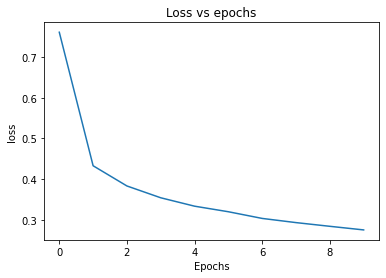

In [ ]:
# Make a plot for the loss
loss_plot = df.plot(y = "loss",title = "Loss vs epochs",legend= False)
loss_plot.set(Xlabel = 'Epochs',ylabel ='loss')

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'Epochs')]

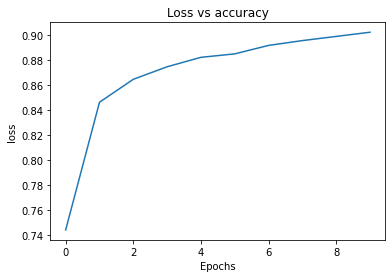

In [ ]:
# Make a plot for the accuracy
loss_plot = df.plot(y = "sparse_categorical_accuracy",title = "Loss vs accuracy",legend= False)
loss_plot.set(Xlabel = 'Epochs',ylabel ='loss')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model
test_loss , test_accuracy , test_mae = model.evaluate(test_images[...,np.newaxis],test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.3070 - sparse_categorical_accuracy: 0.8896 - mean_absolute_error: 4.4200


#### Make predictions from the model

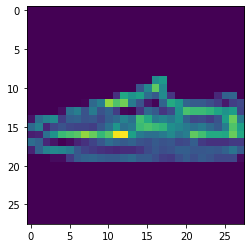

Label: Sneaker


In [ ]:
# Choose a random test image

inx = np.random.choice(test_images.shape[0])
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [ ]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f'Model predictions :{labels[np.argmax(predictions)]}')

Model predictions :Sneaker
